In [1]:
# Analytics Vidhya Hackathon - Big Mart Sales 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#import io
#%cd '/Users/rajeshprabhakar/Desktop/Hackathon/BigMart Sales'

In [4]:
bigmarttrain=pd.read_csv("train_v9rqX0R.csv")

In [5]:
bigmarttest=pd.read_csv("test_AbJTz2l.csv")

In [6]:
bigmarttrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
bigmarttest.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [8]:
bigmarttrain.shape

(8523, 12)

In [9]:
bigmarttrain.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [10]:
bigmarttrain.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
# Data preprocessing  or feature engineering
# 1) Check for Duplicate variables might have same name or different
# name. Inspection of variables. Same min, max, mean, median, Q1, Q2,
# write a for loop

# 2) Single Value Variables. whole column has same value like 0 or 1
# Y, etc.

# 3) Missing Values imputation - By default python will impute null
# cells with NaN or NA.
# a) Drop the missing value rows. if NA are less than 1% and large
# data avaialable
# b) If the variable has >70% missing values then impute with word
# "missing" or "Not Available"
# c) If less than 70% missing values then manual imputation can be
# done
# Numeric Variable - Mean or Median ; Categorical - Mode or Most Frequent
# Manual imputation doesnot take into consideration impact of other
# independent variables for imputation.
# d) Algorithm based Missing Value imputation
# 1) Multivariate Imputation using Chained Equations(MICE) - Impute
# simultaneously both numeric and non numeric Variables.
# 2) KNN Imputer - K Nearest Neighbors Algorithm is used for 
# missing value imputation. KNN uses Euclidean distance and imputes
# with closest distance.
# 3) Probabilistic PCA - Principal Component Analysis algorithm 
# is used for imputation

# 4) Data Transformation - Transformation of independent and 
# dependent variables.
# a) Dependent Variable:
# Positive Skewness - Logarthmic Transformation or 
# Square Root Transformation
# Negative Skewness - Exponential Transformation or
# Power Transformation
# b) Independent Variables - Transformation needed if they are in
# different mathematical units or highly skewed
# 1) Standarad Scaler - Z Score = (x-mean)/std deviation. Standard
# Scaler will give both negative and positive values
# 2) Min-Max Scaler - (X-Xmin)/(Xmax-Xmin) - Min_Max scaler will
# scale all observations in the range of 0 to 1 without negative
# values.

# 5) Correction of duplicate levels in categorical variables. 
# Gender - Male, m, M, male, MALE

# 6) Dummy Variable Encoding - Assigning Numeric identifiers to the
# classes or levels in categorical data.
# a) Label Encoding - Encode in the Same Column and overwrite column
# Gender - M, F, F, F, M, M, M, M
# Gender - 1, 0, 0, 0, 1, 1, 1, 1
# b) pd.get_dummies - Create new columns based on number of classes or
# levels and does binary encoding (No-0 & Yes-1)
# Gender   - M, F, F, F, M, M, M, M
# Gender_M - 1, 0, 0, 0, 1, 1, 1, 1
# Gender_F - 0, 1, 1, 1, 0, 0, 0, 0

# 7) Create new variables from existing variables
# 8) Dealing with Dates. Dates by default are read as object and
# dates must be converted into datetime[ns] format
# 9) Extracting information from date like year, month, day of week,
# quarter, ismonthstart, etc.
# 10) Dimensionality Reduction or Reducing the number of variables

In [12]:
bigmarttrain.isnull().sum().sort_values(ascending=False)#Identify NA

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
bigmarttest.isnull().sum().sort_values(ascending=False)

Outlet_Size                  1606
Item_Weight                   976
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [14]:
print(bigmarttrain.shape)
print(bigmarttest.shape)

(8523, 12)
(5681, 11)


In [15]:
# Add dependentvariable to test data for concatenation of dataframes
bigmarttest['Item_Outlet_Sales']='test'

In [16]:
# Row wise concatenation - Paste all rows of train data first and
# below paste all rows of test data
combinedf=pd.concat([bigmarttrain,bigmarttest],axis=0)
# axis=0 is Row concatenation
# axis=1 is Column Concatenation

In [17]:
combinedf.shape

(14204, 12)

In [18]:
combinedf.Outlet_Size.value_counts(dropna=False)

Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [19]:
combinedf.Outlet_Size=combinedf.Outlet_Size.fillna("Missing")

In [20]:
combinedf.Item_Weight.describe()

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

In [21]:
combinedf.Item_Weight=combinedf.Item_Weight.fillna(
combinedf.Item_Weight.mean()) # mean Imputation

In [22]:
combinedf.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [23]:
combinedf.Item_Identifier.head()

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
Name: Item_Identifier, dtype: object

In [24]:
combinedf['Item_Code']=combinedf.Item_Identifier.apply(
lambda x:x[0:2])

In [25]:
combinedf.Item_Code.value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Code, dtype: int64

In [26]:
combinedf.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [27]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace(
['LF','low fat'],'Low Fat')

In [28]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace(
'reg','Regular')

In [29]:
combinedf.Item_Visibility.describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [30]:
combinedf.Item_MRP.describe()

count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.888400
Name: Item_MRP, dtype: float64

In [31]:
combinedf.Outlet_Identifier.value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [32]:
# Calculate Outlet_Age from Outlet_Establishment_Year as of 2021
combinedf['Outlet_Age']=2021-combinedf.Outlet_Establishment_Year

In [33]:
combinedf.Outlet_Age.describe()

count    14204.000000
mean        23.169319
std          8.371664
min         12.000000
25%         17.000000
50%         22.000000
75%         34.000000
max         36.000000
Name: Outlet_Age, dtype: float64

In [34]:
combinedf.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [35]:
combinedf.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [36]:
combinedf.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales             object
Item_Code                     object
Outlet_Age                     int64
dtype: object

In [37]:
combinedf=combinedf.drop(['Item_Identifier',
                          'Outlet_Establishment_Year'],axis=1)

In [38]:
# Split Data into nuemric & object data
numcols=combinedf.select_dtypes(include=np.number)
objectcols=combinedf.select_dtypes(include=['object'])

In [39]:
print(numcols.shape)
print(objectcols.shape)

(14204, 4)
(14204, 8)


In [40]:
# Move Item_Outlet_Sales from object to Numeric. Since it contains
# text values 'test' it is showing as object.
numcols['Item_Outlet_Sales']=objectcols.Item_Outlet_Sales

In [41]:
objectcols=objectcols.drop('Item_Outlet_Sales',axis=1)

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le=LabelEncoder()

In [44]:
objectcolsencode=objectcols.apply(le.fit_transform)

In [45]:
objectcols.head(2)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Code
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,FD
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,DR


In [46]:
objectcolsencode.head(2)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Code
0,0,4,9,1,0,1,1
1,1,14,3,1,2,2,0


In [47]:
objectcolsdummy=pd.get_dummies(objectcols)

In [48]:
objectcolsdummy.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Code_DR,Item_Code_FD,Item_Code_NC
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [49]:
# Columnwise Concatenation
combinedf_clean=pd.concat([numcols,objectcolsencode],axis=1)

In [50]:
bigmarttraindf=combinedf_clean[
    combinedf_clean.Item_Outlet_Sales!='test']
bigmarttestdf=combinedf_clean[
    combinedf_clean.Item_Outlet_Sales=='test']

In [51]:
bigmarttestdf=bigmarttestdf.drop('Item_Outlet_Sales',axis=1)

In [52]:
bigmarttraindf.Item_Outlet_Sales.dtypes

dtype('O')

In [53]:
bigmarttraindf.Item_Outlet_Sales=bigmarttraindf.Item_Outlet_Sales.astype('float64')

C:\Users\asus\AppData\Local\Temp\ipykernel_8900\4289284348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigmarttraindf.Item_Outlet_Sales=bigmarttraindf.Item_Outlet_Sales.astype('float64')


Skew: 1.1775306028542796
Kurt: 1.6158766814287264


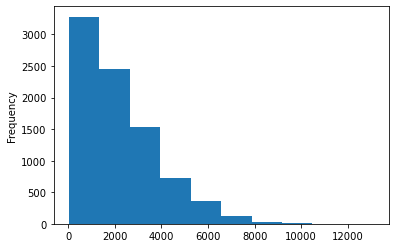

In [54]:
# Create Histogram, Boxplot and Density Curve of Item_Outlet_Sales
bigmarttraindf.Item_Outlet_Sales.plot(kind='hist')
# Positive Skewness & Kurtosis
print("Skew:",bigmarttraindf.Item_Outlet_Sales.skew())
print("Kurt:",bigmarttraindf.Item_Outlet_Sales.kurt())

<AxesSubplot:>

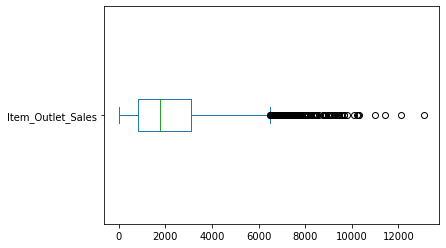

In [55]:
bigmarttraindf.Item_Outlet_Sales.plot(kind='box',vert=False)

<AxesSubplot:ylabel='Density'>

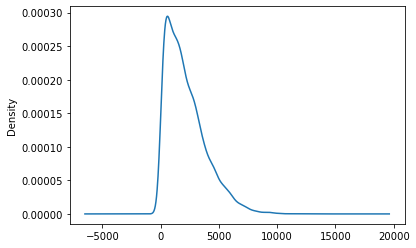

In [56]:
bigmarttraindf.Item_Outlet_Sales.plot(kind='density')

<AxesSubplot:>

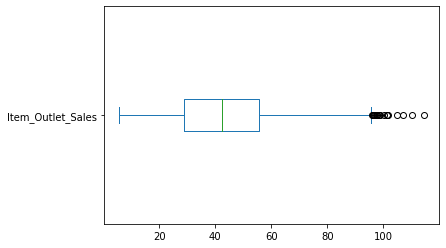

In [57]:
np.sqrt(bigmarttraindf.Item_Outlet_Sales).plot(kind='box',vert=False)

In [58]:
# Inferential Statistics - Hypothesis testing
# Hypothesis testing is comparision of means or averages of or more
# than 2 classes or levels in categorical var with a numeric variable

# Relationship between 2 Numeric Variables - Covariance and Correlation
# Relationship between One numeric variable and other categorical
# variable - Hypothesis testing
# Relationship between 2 Non numeric categorical variables.

# Fundamental Assumtion of Hypothesis testing is means or averages
# of classes or levels must be different. groupby()
# Assumption of Numeric Variable must be numerical continuos,closer
# to normal distrinution with minimum outliers and no missing values.

# One Numeric variable and other variable is categrocial with 
# exactly 2 levels - 2 Sample Independent t test

In [59]:
# What is the Average Item_Outlet_Sales of different Item_Fat_Content?
bigmarttraindf.Item_Outlet_Sales.groupby(
    bigmarttraindf.Item_Fat_Content).mean()
# 0 - Low fat & 1 - Regular

Item_Fat_Content
0    2157.711534
1    2224.561170
Name: Item_Outlet_Sales, dtype: float64

In [60]:
bigmarttraindf.Item_Outlet_Sales.groupby(
    bigmarttraindf.Item_Fat_Content).var() # Unequal Variance

Item_Fat_Content
0    2.883115e+06
1    2.963496e+06
Name: Item_Outlet_Sales, dtype: float64

In [61]:
# Null Hypothesis - There is no significant difference in Average
# Item_Outlet_Sales of different Item_Fat_Content. Both means can
# be treated equally
# Alt Hypothesis - There is significant difference in Average
# Item_Outlet_Sales of different Item_Fat_Content. Both means can
# not be treated equally

# Interpretation of Test output is based on p-value or probability 
# value
# Interpretation based on p-value is REJECT NULL HYPOTHESIS or
# FAIL TO REJECT NULL (ACCEPT) HYPOTHESIS
# p-value is less than 0.05, REJECT NULL HYPOTHESIS
# p-value is greater than 0.05, FAIL TO REJECT NULL HYPOHESIS

# 0.05 means 5% Alpha(probable error rate) and 95% Confidence Level

In [62]:
# Split Data into Lowfat and regular dataframes
lowfat=bigmarttraindf[bigmarttraindf.Item_Fat_Content==0]
regular=bigmarttraindf[bigmarttraindf.Item_Fat_Content==1]

In [63]:
from scipy.stats import ttest_ind

In [64]:
ttest_ind(lowfat.Item_Outlet_Sales,regular.Item_Outlet_Sales,
         equal_var=False)
# Since pvalue=0.08526339464728244 is greater than 0.05, FAIL to 
# REJECT NULL. Difference in means(66.8) is statistically not
# significant and it can be treated as non critical variable

Ttest_indResult(statistic=-1.7212101304652165, pvalue=0.08526339464728244)

In [65]:
# 2 Sample Independent ttest
# a) groupby() - mean & var
# b) Frame Null & Alt Hypothesis
# c) Split Data into Levels or Classes
# d) Conduct test
# e) Interprent result on p-value

In [66]:
# Test Null Average Item_Visibility for different Item_Fat_Content 
# equal?
bigmarttraindf.Item_Visibility.groupby(
    bigmarttraindf.Item_Fat_Content).mean()

Item_Fat_Content
0    0.064330
1    0.069439
Name: Item_Visibility, dtype: float64

In [67]:
bigmarttraindf.Item_Visibility.groupby(
    bigmarttraindf.Item_Fat_Content).var()

Item_Fat_Content
0    0.002619
1    0.002726
Name: Item_Visibility, dtype: float64

In [68]:
ttest_ind(lowfat.Item_Visibility,regular.Item_Visibility,
         equal_var=False)
# Since pvalue=1.404696156360228e-05 is less than 0.05, REJECT NULL
# Hypothesis. Difference in means (0.0005) is statistically
# significant and variable is critical variable

Ttest_indResult(statistic=-4.34668233685042, pvalue=1.404696156360228e-05)

In [69]:
np.round(1.404696156360228e-05,)# 0.00001404696

0.0

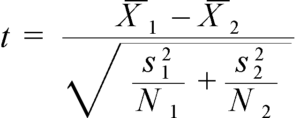

In [70]:
# Test Null Average MRP of different Item_Fat_Content are equal?
bigmarttraindf.Item_MRP.groupby(
    bigmarttraindf.Item_Fat_Content).mean()

Item_Fat_Content
0    140.714098
1    141.504259
Name: Item_MRP, dtype: float64

In [71]:
bigmarttraindf.Item_MRP.groupby(
    bigmarttraindf.Item_Fat_Content).var()

Item_Fat_Content
0    3882.754917
1    3870.679626
Name: Item_MRP, dtype: float64

In [72]:
ttest_ind(lowfat.Item_MRP,regular.Item_MRP,equal_var=False)
# Since pvalue=0.5755481942929463 is greater than 0.05, FAIL to
# REJECT NULL. Difference in means (0.80) is not significant and
# variable is not critical

Ttest_indResult(statistic=-0.5599289442374681, pvalue=0.5755481942929463)

In [73]:
# If one variable is numerical and other variable is categorical
# with more than 2 levels or classes - Anova Single Factor or 
# One Way Anova

# Test Null Average Item_Outlet_Sales for different Outlet_Type is
# equal
# groupby()-mean,Null & Alt Hypo, Split Data, Conduct test, interpret
# Interpretation ia based on p-value similar to above

bigmarttraindf.Item_Outlet_Sales.groupby(
    bigmarttraindf.Outlet_Type).mean()
# 0- Grcery Store, 1 - Super Market Type1 , 2 - Super Market Type1
# 3 - Super Market Type3

Outlet_Type
0     339.828500
1    2316.181148
2    1995.498739
3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [74]:
bigmarttraindf.Item_Outlet_Sales.groupby(bigmarttraindf.Outlet_Size).mean()

Outlet_Size
0    2298.995256
1    2681.603542
2    1822.626947
3    1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [75]:
# Null - There is no Significant difference in Average Item outlet
# Sales for different Outlet Type
# Alt - There is Significant difference in Average Item outlet
# Sales for different Outlet Type

In [76]:
gs=bigmarttraindf[bigmarttraindf.Outlet_Type==0]
st1=bigmarttraindf[bigmarttraindf.Outlet_Type==1]
st2=bigmarttraindf[bigmarttraindf.Outlet_Type==2]
st3=bigmarttraindf[bigmarttraindf.Outlet_Type==3]

In [77]:
from scipy.stats import f_oneway

In [78]:
f_oneway(gs.Item_Outlet_Sales,st1.Item_Outlet_Sales,
        st2.Item_Outlet_Sales,st3.Item_Outlet_Sales)
# Since pvalue=0.0 is less than 0.05, REJECT NULL. Difference in means
# is statistically Significant

F_onewayResult(statistic=894.6500119018012, pvalue=0.0)

In [79]:
# Test Null Average Item_Visibility of different Outlet_Type are
# equal?
# groupby()-mean, Null & Alt, Conduct test, interpret
bigmarttraindf.Item_Visibility.groupby(
    bigmarttraindf.Outlet_Type).mean()

Outlet_Type
0    0.104862
1    0.060723
2    0.061014
3    0.058615
Name: Item_Visibility, dtype: float64

In [80]:
# Null -There is no significant difference in Average Item_Visibility
# of different Outlet_Type
# Alt -There is significant difference in Average Item_Visibility
# of different Outlet_Type

In [81]:
f_oneway(gs.Item_Visibility,st1.Item_Visibility,
        st2.Item_Visibility,st3.Item_Visibility)
# Since pvalue=4.5932234924663505e-158 is less than 0.05, REJECT 
# Null. Difference in Means is Statistically Significant

F_onewayResult(statistic=254.30677497171652, pvalue=4.5932234924663505e-158)

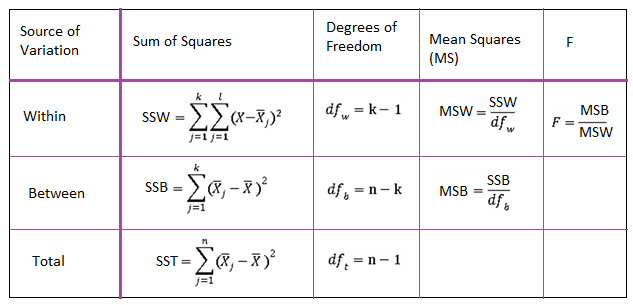
F = MST/MSE
MST = SST/ p-1
MSE = SSE/N-p
SSE = ∑ (n−1)
 
Where,

F = Anova Coefficient

MSB = Mean sum of squares between the groups

MSW = Mean sum of squares within the groups

MSE = Mean sum of squares due to error

SST = total Sum of squares

p = Total number of populations

n = The total number of samples in a population

SSW = Sum of squares within the groups

SSB = Sum of squares between the groups

SSE = Sum of squares due to error

s = Standard deviation of the samples

N = Total number of observations

In [82]:
# If one variable is numerical and Other variable is categorical
# with exactly 2 levels but levels will be Before & After an event
# Paired Sample t test or Related Sample ttest

# Null - There is no significant difference in average value before
# after
# Alt - There is significant difference in average value before
# after

In [83]:
# Test Null Average CPI of India before and after demonitization
# is equal.
beforedemon=[3.35,4.14,5.30,6.46,6.13,6.59,5.86,5.51,5.53,5.91,6.32,6.72]
afterdemon=[2.59,2.23,1.86,2.62,2.62,2.21,1.09,1.08,1.79,2.52,2.89,3.24]

In [84]:
print(np.mean(beforedemon))
print(np.mean(afterdemon))

5.651666666666667
2.2283333333333335


In [85]:
from scipy.stats import ttest_rel

In [86]:
ttest_rel(beforedemon,afterdemon)
# Since pvalue=3.607160215114515e-07 is less than 0.05, REJECT NULL
# Difference in means is statistically significant

Ttest_relResult(statistic=10.739765011583762, pvalue=3.607160215114515e-07)

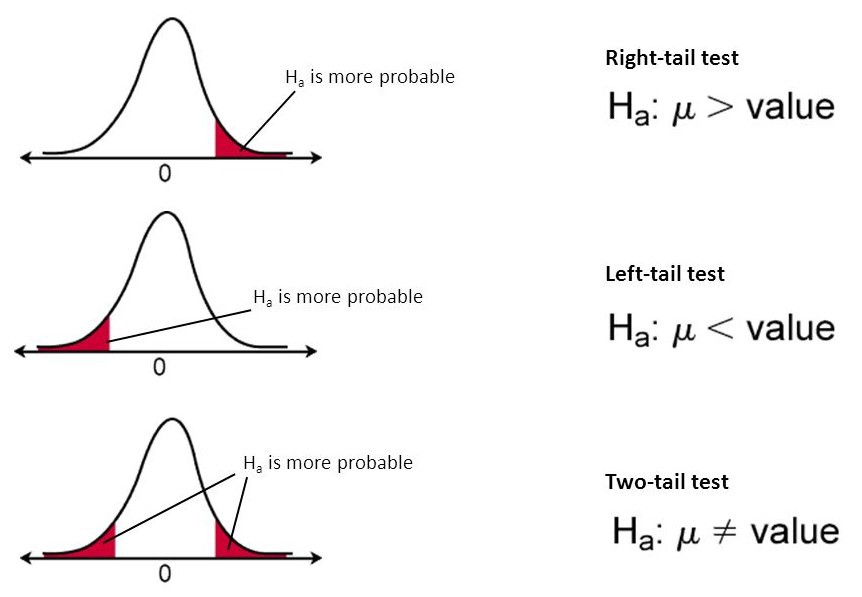

In [87]:
# Test Null Average CPI 12 month Before and After GST Implementation
# equal.
beforegst=[1.08,1.09,2.21,2.61,2.62,1.86,2.23,2.59,3.35,4.14,5.30,6.46]
aftergst=[1.79,2.52,2.89,3.24,3.97,4.00,5.11,4.74,4.36,3.97,3.96,3.93]

In [88]:
print(np.mean(beforegst))
print(np.mean(aftergst))

2.9616666666666664
3.706666666666667


In [89]:
# Null - There is no significant difference between Average CPI before 
# and after gst implementation
# Alt - There is significant difference between Average CPI before 
# and after gst implementation

In [90]:
ttest_rel(beforegst,aftergst)
# Since pvalue=0.1169504252841088 is greater than 0.05, FAIL to 
# REJECT NULL. Difference in means is Statistically Insignificant

Ttest_relResult(statistic=-1.7012796926409819, pvalue=0.1169504252841088)

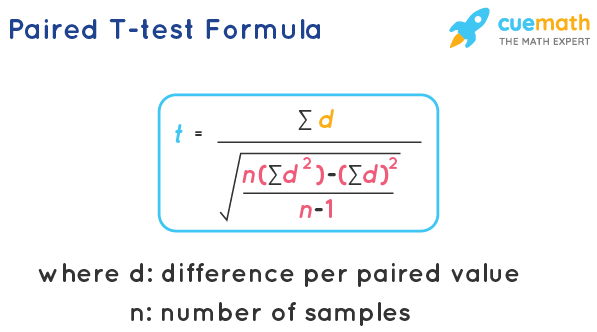

In [91]:
# Both Variables are non numeric and categorical - Chi Square Test
# of Independence
# Input of Chi Square Test of Independence is Cross Tabulation
# Cross tabulation is frequency table of 2 non numeric categorical
# variables
pd.crosstab(bigmarttraindf.Outlet_Type,bigmarttraindf.Outlet_Size)
# Outlet_Type -  0- Grcery Store, 1 - Super Market Type1 , 
# 2 - Super Market Type1 3 - Super Market Type3
# Outlet_Size - 0- High 1 -Medium 2- Missing 3 - Small

Outlet_Size,0,1,2,3
Outlet_Type,,,,
0,0,0,555,528
1,932,930,1855,1860
2,0,928,0,0
3,0,935,0,0


In [92]:
# Null - There is no Association/Relationship between both variables
# Alt - There is Association/Relationship between both variables

In [93]:
from scipy.stats import chi2_contingency

In [94]:
chi2_contingency(pd.crosstab(bigmarttraindf.Outlet_Type,
                            bigmarttraindf.Outlet_Size))
# Since p-value=0.0, is less than 0.05, REJECT NULL

(5380.286956123782,
 0.0,
 9,
 array([[ 118.42731433,  354.90073918,  306.23372052,  303.43822598],
        [ 609.85146075, 1827.59134108, 1576.97641675, 1562.58078141],
        [ 101.47788337,  304.10700458,  262.40525637,  260.00985568],
        [ 102.24334155,  306.40091517,  264.38460636,  261.97113692]]))

In [95]:
# Test Null There is no Association or Relationship between 
# Outlet_Type and Outlet_Location_Type

In [96]:
pd.crosstab(bigmarttraindf.Outlet_Location_Type,
            bigmarttraindf.Outlet_Type)

Outlet_Type,0,1,2,3
Outlet_Location_Type,,,,
0,528,1860,0,0
1,0,2785,0,0
2,555,932,928,935


In [97]:
chi2_contingency(pd.crosstab(bigmarttraindf.Outlet_Location_Type,
            bigmarttraindf.Outlet_Type))
# Since p-value=0 REJECT NULL

(4725.606588766826,
 0.0,
 6,
 array([[ 303.43822598, 1562.58078141,  260.00985568,  261.97113692],
        [ 353.88419571, 1822.35656459,  303.23594978,  305.52328992],
        [ 425.67757832, 2192.062654  ,  364.75419453,  367.50557315]]))

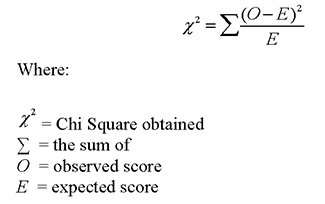

In [98]:
#Machine learning is training the machine or computer on historical data and use them for making predictions on current data ot future data
#Machine learning uses statistical methodologies but do not strictly adhere to statistical assumptions.

#Machine learning - Supervised learning and unsupervised learning
#Supervised learning - Understand data thoroughly and also know which machine learning model to implement
#Unsupervised learning - No understanding of data and do not know which machine learning models to implement.

#Supervised learning - 
# 1. Regression Techniques - Dependent varaible  (y) is numerical, continuous, closer to normal distribution with minimun outliers and no missing values
# 2. Classification Techniques - Dependent variable (y) is non-numeric, either binary (yes/no) or mulltinomial (more than 2 levels of groups)


In [99]:
#Supervised learning - Regression techniques - Multiple linear regression
#Multiple linear regression explains the linear relationship between a dependent variable (y) and multiple independent variables (X).
#Linear relationship indicated a straight line relationship.

#Multiple linear regression is an equation - y = B0 + B1X1 + B2X2 + B3X3 + B4X4 + .... + BnXn + Et
#y-Dependent variable
#B0- intercept or constant. Point at which straight line touches y-axis
#B1,B2,B3,B4,....,Bn- Coefficients
#X1,X2,X3,X4,....,Xn- Independent variables
#Et- Residual = ActualValue - Predicted Value or Error term

#In MLR, we have data for y and data for all X's. We do not have the intercept and coefficients. Algorithm will solve for intercept and coefficients.


In [100]:
# MLR is an parametric algorithm that has many assumptions or high bias to be met before implementing the algorithm
# Assumptions:
# 1. Dependent variable (y) is numeric, continuous, closer to normal distribution with minimal outliers and no missing values
# 2. Independent variable can be both numerical, non-numerical categorical
# 3. linearity - there must be a logical linear relationship between dependent and independent variables.
# 4. No multi-collinerity- Multi-collinearity mean very strong correlation greater then 0.95 between variables. 
#    If multi-collinearity exists, do not include both variables, choose one among them.
#    Variance inflation factor (VIF) greater than 2 indicates multi-collinearity among variables.
# 5. Exogenity - Dependent variable is dependent on independent variables but not vice-versa. y is dependent on X's but X's do not depend on y.
# 6. Sample size required is minimun 20 observations for variable.

# Post model assumptions on Residuals.
# 7. Residuals must be normally distributed: check using normal q-q plot.
# 8. Residuals must be in homoscedatic pattern

In [101]:
#Interpretation of output in Python only (Non Statistical Output)
# 1. R square must be between 0.60 - 0.95. R square explains the amount of variance occuring in the dependent variable caused by the model or independent variables.
# 2. Intercept + Coefficients - Using which a regression equation will be built and it will used for predicting values (yhat)

# Diagnostic for all Regression models.
# Root mean square error (RMSE) - there is no fixed range but the model that has least RMSE is best fit model.

In [102]:
bigmarttraindf.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age',
       'Item_Outlet_Sales', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Code'],
      dtype='object')

In [103]:
bigmarttraindf[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age','Item_Outlet_Sales']].corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Outlet_Sales
Item_Weight,1.000000,-0.012582,0.024806,0.004267,0.011083
Item_Visibility,-0.012582,1.000000,-0.001315,0.074834,-0.128625
Item_MRP,0.024806,-0.001315,1.000000,-0.005020,0.567574
Outlet_Age,0.004267,0.074834,-0.005020,1.000000,0.049135
Item_Outlet_Sales,0.011083,-0.128625,0.567574,0.049135,1.000000


In [104]:
# Split data into dependent variable y and independent variable X
y=bigmarttraindf.Item_Outlet_Sales
X=bigmarttraindf.drop('Item_Outlet_Sales',axis=1)

In [105]:
X.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Code
0,9.30,0.016047,249.8092,22,0,4,9,1,0,1,1
1,5.92,0.019278,48.2692,12,1,14,3,1,2,2,0


In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
reg=LinearRegression()

In [108]:
regmodel=reg.fit(X,y)

In [109]:
regmodel.score(X,y) # R square indicated underfitting as the R square is below the required threshold of 0.6-0.95

0.5037944436324737

In [110]:
regmodel.intercept_

-891.2813496171093

In [111]:
print(list(zip(X.columns,regmodel.coef_)))

[('Item_Weight', -0.5610054430218245), ('Item_Visibility', -1627.9687502221373), ('Item_MRP', 15.577893892771849), ('Outlet_Age', 1.3154434455145345), ('Item_Fat_Content', 54.349177940256915), ('Item_Type', -0.9336925645713626), ('Outlet_Identifier', 56.4711039987831), ('Outlet_Size', -93.01982139301317), ('Outlet_Location_Type', -122.16153062331301), ('Outlet_Type', 831.4510956704755), ('Item_Code', -18.31338473198781)]


In [112]:
# Regression equation for prediction is
# Item_Outlet_Sales = -891.28 - 0.56*Item_weight - 1627.96 * Item_Visibility + 15.57*Item_MRP + 1.31*Outlet_Age + 54.34*Item_Fat_Content
# - 0.93*Item_Type + 56.47*Outlet_Identifier - 93.01*Outlet_Size - 122.16*Outlet_Location_Type + 831.45*Outlet_Type - 18.31*Item_Code

In [113]:
regpredict=regmodel.predict(X)

In [114]:
regresidual=y-regpredict

In [115]:
np.sqrt(np.mean(regresidual**2)) #RMSE

1202.019538510332

In [116]:
bigmarttraindf.to_csv("bigmarttrain.csv") #Exporting dataframe

In [117]:
from sklearn.tree import DecisionTreeRegressor

In [118]:
tree=DecisionTreeRegressor(max_depth=6)

In [119]:
treemodel=tree.fit(X,y)

In [120]:
treemodel.score(X,y)

0.6121883612629586

In [121]:
from sklearn.model_selection import cross_val_score

In [122]:
cross_val_score(tree,X,y)

array([0.59517051, 0.57175009, 0.57200163, 0.60250444, 0.60063837])

In [123]:
np.mean([0.59517051, 0.57182208, 0.57209755, 0.60261136, 0.60063837])

0.5884679740000001

In [124]:
treepredict=treemodel.predict(bigmarttestdf)

In [125]:
pd.DataFrame(treepredict).to_csv("treepredict.csv")

In [126]:
from sklearn.ensemble import RandomForestRegressor

In [135]:
rf=RandomForestRegressor(n_estimators=2000,max_depth=8)

In [136]:
rfmodel=rf.fit(X,y)

In [137]:
rfmodel.score(X,y)

0.6563226166278022

In [138]:
cross_val_score(rf,X,y)

array([0.60462605, 0.57929057, 0.56988135, 0.59197875, 0.60384561])